# Homework 4: Compartmental Models + Data Visualization (Fall, 2023)


## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Sunday, December 3, 2023** 

It should be uploaded into D2L Homework #4.  Submission instructions can be found at the end of the notebook.

---
<a id="toc"></a>

## Table of Contents

[Part 0. Academic Integrity Statement](#part_0) (2 points)

[Part 1. Understanding compartmental models](#part_1)  (23 points)

[Part 2. Simulating differential equations](#part_2)  (20 points)

[Part 3. Interpreting results of simulations](#part_3) (15 points)

[Part 4. Data visualization](#part_4) (17 points)

[Part 5. Data interpretation](#part_5) (16 points)

Total points = 93.

---
<a id="part_0"></a>

## Part 0. Academic integrity statement (2 points)

[Back to Top](#toc)

In the markdown cell below, paste your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.

<font size=6 color="#009600">&#9998;</font> I, `Andrew Koren`, commit to `upholding integrity as my guiding principle in academia and life. My commitment encompasses values such as honesty, fairness, and the relentless pursuit of knowledge. I pledge to avoid plagiarism, provide transparent source attribution, and adhere to Michigan State University's ethical standards. I understand that academic integrity is not just about rules; it forms the bedrock of a just educational system. I am dedicated to being an ethical member of the community, shaped by these principles.`

---
<a id = "part_1"></a>
## Part 1. Understanding compartmental models (23 total points)

[Back to Top](#toc)



Antibiotic resistence is developed when germs or bacteria that could be killed by antibiotics in the past can still survive and grow when the same antibiotics are applied. It is a major global public health threat, according to the Centers for Disease Control and Prevention (CDC). Here's a graph that summarizes how antibiotic resistence can be developed ([source: CDC](https://www.cdc.gov/narms/faq.html#)):

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/main/Homework/01_cdc_ar.jpeg?raw=true">


Now, someone wrote down a compartmental model for antibiotic resistence:
<!-- ![antibiotics_model.png](attachment:antibiotics_model.png) -->
<div>
<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/main/Homework/02_antibiotics_model.png?raw=true" width="400"/>
</div>
You will need to conceptually analyze this model and write down the model as ordinary differential equations (ODEs).

&#9989;&nbsp; **Part 1.1 (5 points)**

Describe in the cell below: how many compartments there are in the model, and what each of the compartments stands for. 

<font size=6 color="#009600">&#9998;</font> *There are two compartments, resistant bacteria which aren't affected by antibiotics, and suceptible bacteria which aren't immune*

&#9989;&nbsp; **Part 1.2 (8 points)**

Describe in the cell below the interpretation of each of the following parameters
- $b$ natural division rate
- $k_S$ Natural death rate
- $k_R$ Natural death rate
- $c$ Conversion from suceptible to resistant bacteria

in terms **what rate it represents** and **in which step of the above CDC infograph it was reflected**.

&#9989;&nbsp; **Part 1.3 (4 points)**

Answer in the cell below: Which of $k_S$ and $k_R$ should be bigger for the model to be realistic? Why?

<font size=6 color="#009600">&#9998;</font> *$k_S$, since antibiotics kill them faster*   

&#9989;&nbsp; **Part 1.4 (6 points)**

In the cell below, write down the ordinary differential equations associated with this compartmental model.


<font size=6 color="#009600">&#9998;</font> 
$$\frac{dS}{dt} = bS - k_SS - cSR = (b-k_S-cR)S$$ 
$$\frac{dR}{dt} = bR - k_RR + cSR = (b-k_R+cS)R$$


<a id="part_2"></a>
## Part 2. Solving differential equations numerically (20 total points)

[Back to Top](#toc)

In previous assignments, you have used `solve_ivp` to compute the numeric solution of the logistic model of the growth of a single population. Recall, the Logistic population model is described by the following differential equations:

\begin{equation}
\frac{dP}{dt} = kP\Big(1-\frac{P}{C}\Big),
\end{equation}

where $P =$ population, $k =$ growth rate, and $C =$ the carrying capacity. 

Examples code for computing the solution for for $P_0 =0.1$ billion (initial population), $k=1$, and $C =1$ billion is provided below:

In [1]:
# example code to compute a numeric solution of the logistic model
import numpy as np
from scipy.integrate import solve_ivp

# define the derivative
def logistic(time, current_state):
    p = current_state   
    dpdt = p*(1-p)    
    return dpdt

# compute numeric solution
initial_p = [0.1]
time = np.linspace(0,10,50)

result = solve_ivp(logistic, (0,20), initial_p, t_eval = time)

# unpack solution
numerical_p = result.y[0,:]

Now you wonder: what happens if there are two different species competing for the same resources? (Such as the great white sharks and the seven-gill sharks &#x1F609;) How would the population growth of one species interfere with that of the other? 

Luckily, such models already exist. One of them is a generalization of the logistic model to take into account resource competition between two species $u$ and $v$ and we have the following competitive Lotka-Volterra model:

$$ \frac{du}{dt} = r_1u(1-(\frac{u +a_{12} v}{K_1}))$$
$$ \frac{dv}{dt} = r_2v(1 -(\frac{v + a_{21}u}{K_2})).$$

Here, $a_{12}$ represents the competitive effect species $v$ has on the population of species $u$ and $a_{21}$ represents the competitive effect species u has on the population of species v. These values do not have to be equal. Because this is the competitive version of the model, all interactions must be harmful (competition) and therefore all a-values are positive.

After scaling, the **two species competitive Lotka-Volterra model** can become to the simplified case:
\begin{align}
\frac{du}{dt} &= u(1-u -\alpha v)  &(1)\\
\frac{dv}{dt} &= rv(1 -v-\beta u). &(2)
\end{align}

We say that the competition on the species u (resp.
on the species v) is **strong** if $\alpha > 1$ (resp. $\beta > 1$).We say that the competition on the species
u (resp. on the species v) is **weak** if $0 < \alpha < 1$ (resp. $0 < \beta< 1$). 

**Your job for this part of the assignment is implementing and computing the numeric solutions for the two species competitive Lotka-Volterra model as described by equations 1 and 2 above. You can do so by adapting the code for the logistic model above.**

&#9989;&nbsp; **Part 2.1 (8 points)**  
Define the derivative function for the two species competitive Lotka-Volterra model in the cell below (to be used as an input later for `solve_ivp` -- so pay attention to the format).

In [2]:
# write your function here
def deriv_comp(t,init,a,b,r):
    u,v = init
    #a,b,r = coeff
    dudt = u*(1-u-a*v)
    dvdt = r*v*(1-v-b*u)
    return dudt, dvdt

&#9989;&nbsp; **Part 2.2 (6 points)**

Using `solve_ivp`, compute the numeric solution for two species competitive Lotka-Volterra model with the parameters $r=1$, $\alpha=2/3,$ $\beta =1/4$, the initial conditions $[u_0,v_0]= [0.9,0.5]$, and the final time equal 20. Unpack the result you get from `solve_ivp` into separate variables `u` and `v`.

In [3]:
# put your code here
u,v = 0.9, 0.5
a = 2/3
b = 1/4
r = 1
initial = [u, v]
#coeff = [a,b,r]
time = np.linspace(0,20,50)

result = solve_ivp(deriv_comp,(0,20),initial, t_eval = time, args=(a,b,r))
u = result.y[0]
v = result.y[1]


&#9989;&nbsp; **Part 2.3 (4 points)**

Plot the solutions of $u$ and $v$ as a function of time in the cell below. Be sure to add appropriate axis labels and legends. 

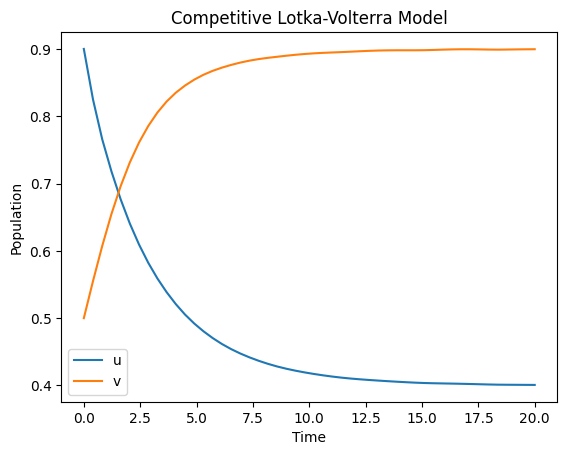

In [4]:
# put our code here
import matplotlib.pyplot as plt
plt.title('Competitive Lotka-Volterra Model')

plt.plot(time,u, label = 'u')
plt.plot(time,v, label = 'v')
plt.legend()
plt.ylabel('Population')
plt.xlabel('Time')
plt.show()

&#9989;&nbsp; **Part 2.4 (2 points)**

When $\alpha > 0,\beta <1$, we call the model a weak competitive Lotka-Volterra model. Check with the plot above to see what will happen as time goes on. Can the two species, i.e. $u$ and $v$, coexist or one species will die out?

<font size=6 color="#009600">&#9998;</font> *The model above shows u decline, but it does not decline to zero*

<a id="part_3"></a>
## Part 3. Interpreting model behavior for different parameters and initial conditions  (15 total points)

In Part 2, you have explored the two species competitive Lotka-Volterra model in a weak-weak scenario, i.e. neither species were very competitive with parameters $\alpha$ and $\beta$ both less than 1. 

In this part, you will be shown the solutions of the model under a couple of different competition scenarios and initial conditions. You will be asked to interpret these plots.

&#9989;&nbsp; **Part 3.1 (5 points)** Strong weak competition

The figure below shows the  numerically solved population growth dynamics of the two species $u$ and $v$:

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/main/Homework/03_CLV_strongweak.png?raw=true">

The initial population was $u_0 = 0.9$ and $v_0 = 0.5$. The parameters were $\alpha = 2$ and $\beta=3/4$. In the cell below, answer the following questions:

1. Based on the plot, which species was more successful at the beginning? which species was more successful at the end? Here success is measured by population size. 

2. Based on the plot, which species was more competitive?

3. Connecting your visual interpretations to the model parameters $\alpha$ and $\beta$, explain how these two parameters determine which species is strongly competitive and which species is weakly competitive.

<font size=6 color="#009600">&#9998;</font> 
1. u started higher, but quickly declined (v actually also initally declined before growing) 
2. v was more competitive
3. $\alpha$ is so large that the v population quicky depletes the u population, $\beta$ is negligible in comparison

&#9989;&nbsp; **Part 3.2 (4 points)** Weak strong competition

Now we changed the parameters so that $\alpha=1/2$ and $\beta =2$, with initial conditions remain the same. We obtained the following figure:

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/main/Homework/04_CLV_weakstrong.png?raw=true">

In the cell below, answer the following questions:
1. How is this figure different from the one in Part 3.1?
2. How are the changes in parameters $\alpha$ and $\beta$ related to changes in the figure?

<font size=6 color="#009600">&#9998;</font>
1. v depletes instead of u
2. This is the same as 3.1, only $\alpha$ and $\beta$ are swapped

&#9989;&nbsp; **Part 3.3 (6 points)** Strong strong competition

We changed the parameters again to be $\alpha=2$ and $\beta =3$.

First, we set the initial population of the two species to be $u_0 = 0.9$ and $v_0 = 0.4$. We obtained the figure below:

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/main/Homework/05_CLV_strongstrong1.png?raw=true">

Then, we use a different set of initial population levels with $u_0 = 0.4$ and $v_0 = 0.9$. We obtained the figure below:

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/main/Homework/06_CLV_strongstrong2.png?raw=true">

Compare the two figures, and answer the following questions in the cell below:

1. In what aspects are these two figures different in terms of the final outcome? 

2. What differences in the model caused the differences in the figures?

3. Why would the short term dynamics of the two figures look different, even if you swap the color in the second figure?

<font size=6 color="#009600">&#9998;</font> 
1. u and v have opposite results (extinction/takeover)
2. starting population
3. Since $\alpha$ and $\beta$ are greater than 1 in both situations, both populations will deplete as long as the other exists, so the starting condition determines which will race to zero first

<a id="part_4"></a>
## Part 4. Data Visualization for the Great American Crime Decline

In the 1990s, crime rates in the US plummeted -- but nobody knows why! Criminologists have come up with different theories but none can account for the magnitude of the drop (read [this article](https://www.themarshallproject.org/2014/11/24/10-not-entirely-crazy-theories-explaining-the-great-crime-decline) for some of the major theories). Thus, the cause of this **great American crime decline** remains a mystery. 

You decided to the take the matter into your own hands. 

&#9989;&nbsp; **Part 4.1 (2 points)** Data Context

You found some crime data online from [this website](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/about). Describe briefly in the cell below how the data was collected. 


<font size=6 color="#009600">&#9998;</font> Records from each state are collected by the FBI

&#9989;&nbsp; **Part 4.2 (3 points)** Loading and cleaning data

Now that you know something about the context of your data, it's time to read it into your notebook. 

In the cell below: 
* Read in the data file `estimated_crimes_1979_2022.csv`
* Remove any rows with NaN values in the "state_abbr" column and save it as a new dataframe 
* Drop any columns with remaining NaN values from your new dataframe

If your cleaning worked correctly, you should have roughly 2200 rows and 12 columns. 

In [5]:
import pandas as pd

In [6]:
# put your code here
data = pd.read_csv('estimated_crimes_1979_2022.csv')
#data.head()
data_without_nan = data.dropna(subset=['state_abbr'])
data_without_nan_dropped = data_without_nan.dropna(axis=1)
data_without_nan_dropped.head()


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
1,1979,AK,Alaska,406000,1994,54,445,1203,23193,5616,15076,2501
2,1979,AL,Alabama,3769000,15578,496,4127,9918,144372,48517,83791,12064
3,1979,AR,Arkansas,2180000,7984,198,1626,5565,70949,21457,45267,4225
4,1979,AZ,Arizona,2450000,14528,219,4305,8884,177977,48916,116976,12085
5,1979,CA,California,22696000,184087,2952,75767,93129,1511021,496310,847148,167563


&#9989;&nbsp; **Part 4.3 (4 points)** Choosing a question and getting the data

Recall the key pieces to an effective data visualization (from the Day 20 Pre Class and In Class assignments). There are many visualizations you could make from this data to gain some insight into how crime has changed in the past 44 years. Potential questions that can be answered with the data are listed below. 

**RQ 1:** How are Property Crime rate and the Burglary rate related for the ten highest population states? 

**RQ 2:** How do the most common categories of crime compare between the 5 most populous states and the 5 least populous states? 

**RQ 3:** Choose one category of crime and at least 5 different states. How does the crime rate change over time for each state?

In the cell(s) below, indicate which question you are going to explore. Then, using your clean data set, extract the data necessary for answering your question (i.e. use masking to extract state data, remove rows or columns you will not use, etc.).

**Display your extracted data for full credit**


<font size=6 color="#009600">&#9998;</font> RQ1

In [7]:
import matplotlib.pyplot as plt

In [21]:
# put your code here to extract a subset of data relevant to your question
data = data_without_nan_dropped

# Filter data for the ten states with the highest populations
top_10_state_names = data[data['year']==2022].nlargest(10, 'population')['state_name']
top_10_states = data[data['state_name'].isin(top_10_state_names)]
top_10_states

## Calculate Property Crime Rate and Burglary Rate
#top_10_states['property_crime_rate'] = top_10_states['property_crime'] / top_10_states['population'] * 1000
#top_10_states['burglary_rate'] = top_10_states['burglary'] / top_10_states['population'] * 1000
#
## Create a scatter plot
#plt.figure(figsize=(8, 6))
#plt.scatter(top_10_states['property_crime_rate'], top_10_states['burglary_rate'], color='blue', alpha=0.7)
#plt.title('Relationship between Property Crime Rate and Burglary Rate')
#plt.xlabel('Property Crime Rate (per 1000 people)')
#plt.ylabel('Burglary Rate (per 1000 people)')
#plt.grid(True)
#
#for i, state_name in enumerate(top_10_states['state_name']):
#    plt.annotate(state_name, (top_10_states['property_crime_rate'].iloc[i], top_10_states['burglary_rate'].iloc[i]))
#
## Show plot
#plt.show()
#

,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
5,1979,CA,California,22696000,184087,2952,75767,93129,1511021,496310,847148,167563
10,1979,FL,Florida,8860000,73881,1084,22097,46124,607281,190884,378099,38298
11,1979,GA,Georgia,5118000,28594,877,10939,14562,248641,81579,145758,21304
15,1979,IL,Illinois,11230000,83540,1203,36056,42579,593750,161776,356062,75912
23,1979,MI,Michigan,9208000,56558,834,20218,31406,509457,138806,315211,55440
...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2022,NC,North Carolina,10698973,43344,862,5875,33340,220841,39668,159845,21328
2267,2022,NY,New York,19677151,84469,783,22040,55841,338757,31976,279810,26971
2268,2022,OH,Ohio,11756058,34510,718,6243,21857,209575,30015,151994,27566
2271,2022,PA,Pennsylvania,12972008,36307,1020,8829,22630,192311,19231,151931,21149


&#9989;&nbsp; **Part 4.3 (8 points)** Making a Plot

Now that you have only the data you need, it's time to create a plot! Using the plotting tools you have explored (i.e. `matplotlib.pyplot`, `seaborn`, and/or `pandas`), create a plot that answers your question. Your plot will be graded with the rubric from Day 20:

1. **Does the plot tell a story? (4 Points)** 
2. **No wasted space (2 points)**
3. **Labels, legend, and title are informative without cluttering (1 points)**
4. **Presenting multi-variable data (1 points)**

In [ ]:
# put your code here to create a plot


<a id="part_5"></a>
## Part 5. Data Interpretation

As described in [this article](https://www.themarshallproject.org/2014/11/24/10-not-entirely-crazy-theories-explaining-the-great-crime-decline), increased policing has been considered a potential explanation for the great American crime decline. In the part of the assignment, you will interpret visualizations of policing and crime data ([source](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)) to infer whether increased policing is a main cause of the crime decline. 


&#9989;&nbsp; **Part 5.1 (2 points)** 

Based on [this article](https://www.themarshallproject.org/2014/11/24/10-not-entirely-crazy-theories-explaining-the-great-crime-decline), answer in the cell below, what would be evidence **against** of the increased policing theory?


<font size=6 color="#009600">&#9998;</font> *Put your answer here*

&#9989;&nbsp; **Part 5.2 (10 points)** 

The below graphs shows the crime rates (left) and policing rates (right) over the years for a few different states. 

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/main/Homework/07_vcrime_police_by_year.png?raw=true">

Examine the figures and answer the following questions in the cell below:

1. Is there a great Amercian crime decline? What features of the figures provide evidence for your claim?
2. Is there a increase in policing during the 1990s (i.e. period of the crime decline)?
3. Is increased policing a good explanation for the crime decline? What features of the figures support your claim?

<font size=6 color="#009600">&#9998;</font> *Put your answer here*

&#9989;&nbsp; **Part 5.3 (4 points)** 

Below is a visualization of the relationship between the violent crime rates and the policing rates for the same year. 

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/main/Homework/08_vcrime_by_police.png?raw=true">

Examine the figure and answer the following questions:

1. Based on the figure, do you think increased policing is a good explanation for the great crime decline? Why?
2. How would you plot the data differently to better show whether or not increased policing can reduce crime? Why?

<font size=6 color="#009600">&#9998;</font> *Put your answer here*

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University